In [ ]:
## export dataset in octave
# load('ex5data.mat')
# csvwrite('training.csv',[X,y])
# csvwrite('cross_validation.csv',[Xval,yval])
# csvwrite('test.csv',[Xtest,ytest])

In [161]:
# load dataset
import pandas as pd
training_data = pd.read_csv('training.csv',header=None)
cross_validation = pd.read_csv('cross_validation.csv',header=None)
test= pd.read_csv('test.csv',header=None)


In [162]:
import numpy as np
x = training_data.as_matrix([0]);
y = training_data.as_matrix([1]);
x_cv = cross_validation.as_matrix([0])
y_cv = cross_validation.as_matrix([1])
x_test = test.as_matrix([0])
y_test = test.as_matrix([1])

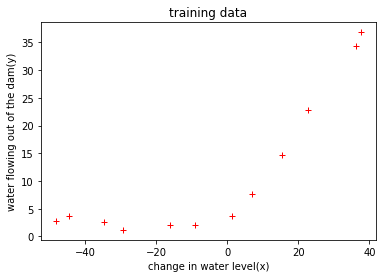

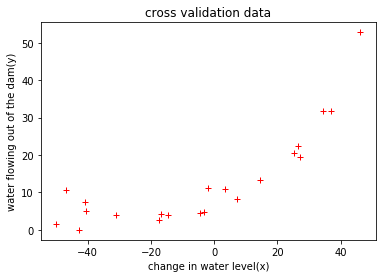

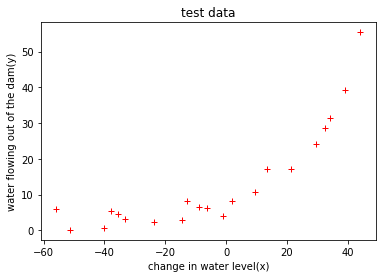

In [163]:
from matplotlib import pyplot as plt

def plotData(x,y,title):
    plt.plot(x,y,'r+')
    plt.xlabel('change in water level(x)')
    plt.ylabel('water flowing out of the dam(y)')
    plt.title(title)
    plt.show()
    
plotData(x,y,'training data')
plotData(x_cv,y_cv,'cross validation data')
plotData(x_test,y_test, 'test data')

In [164]:
from sklearn import linear_model

reg = linear_model.LinearRegression();
reg.fit(x,y);

print('coef: ', reg.coef_)
print('intercept: ', reg.intercept_)

coef:  [[0.36777923]]
intercept:  [13.08790351]


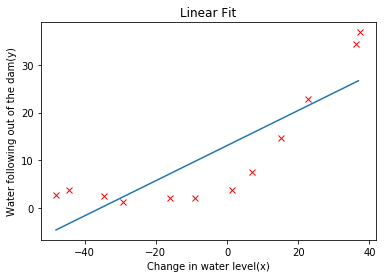

In [165]:
x_min = min(x.flatten())
x_max = max(x.flatten())
x_predict = np.arange(x_min,x_max)
x_predict = x_predict.reshape(-1,1)
y_predict = reg.predict(x_predict)

def plotFit(x,y,x_predict, y_predict):
    plt.plot( x, y,'rx');
    plt.plot( x_predict, y_predict, '-')
    plt.xlabel('Change in water level(x)')
    plt.ylabel('Water following out of the dam(y)')
    plt.title('Linear Fit')
    plt.show();
plotFit(x,y,x_predict,y_predict)

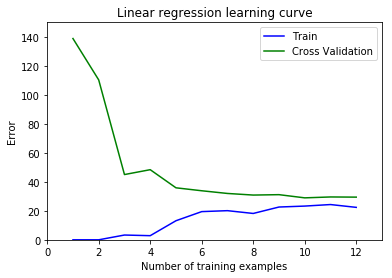

[0.0, 6.162975822039155e-32, 3.286595045501268, 2.842677689399797, 13.154048809114919, 19.443962512495464, 20.098521655088874, 18.172858695200016, 22.60940542495473, 23.26146159261182, 24.31724958804416, 22.373906495108915]
[138.8467769758242, 110.30036610764688, 45.01023137857436, 48.36891136981957, 35.8651647503117, 33.82996159713878, 31.97098579816958, 30.862446323779803, 31.13599795502484, 28.936207468250206, 29.551431621997963, 29.433818129942686]


In [166]:
def calcError(ypredict, y):
    m = len(y)
    return 1/(2*m) * sum((ypredict-y)**2)[0]

def learnCurve(x,y,x_cv,y_cv):
    reg = linear_model.LinearRegression();
    reg.fit(x,y);
    
    y_predict = reg.predict(x)
    y_cv_predict = reg.predict(x_cv)
    
    training_error = calcError(y_predict,y)
    cv_error = calcError(y_cv_predict, y_cv)
    
    return training_error, cv_error

def calcLearnCurve(x,y,x_cv,y_cv):
    n = len(x)
    t_errors = []
    cv_errors = []
    for i in range(1,n+1):
        x_range = x[:i]
        y_range = y[:i]
        t_error,cv_error = learnCurve(x_range,y_range,x_cv,y_cv)
        t_errors.append(t_error)
        cv_errors.append(cv_error)
    return t_errors, cv_errors

def plotLearnCurve(t_errors,cv_errors):
    x = np.arange(1,len(t_errors)+1)
    plt.plot(x,t_errors,'b',x,cv_errors,'g')
    plt.xlabel('Number of training examples')
    plt.axis([0,13,0,150])
    plt.ylabel('Error')
    plt.legend(['Train','Cross Validation'])
    plt.title('Linear regression learning curve')
    plt.show()
    
t_errors, cv_errors = calcLearnCurve(x,y,x_cv,y_cv)
plotLearnCurve(t_errors, cv_errors)
print(t_errors)
print(cv_errors)

In [167]:
def polynomial(x,p):
    x_poly = x
    for i in range(2,p+1):
        xx = x**i
        x_poly = np.insert(x_poly, i-1, xx.flatten(), axis=1)
    return x_poly
        
x_poly_8 = polynomial(x,8)
x_poly_predict_8 = polynomial(x_predict,8)
x_cv_poly_8 = polynomial(x_cv,8)

In [168]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_poly_8)
x_poly_8 = scaler.transform(x_poly_8)
x_poly_predict_8 = scaler.transform(x_poly_predict_8);
x_cv_poly_8 = scaler.transform(x_cv_poly_8);

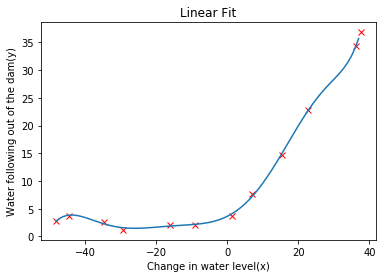

In [169]:
poly_reg = linear_model.LinearRegression();
poly_reg.fit(x_poly_8,y);

y_poly_predict = poly_reg.predict(x_poly_predict_8)
plotFit(x,y,x_predict,y_poly_predict)

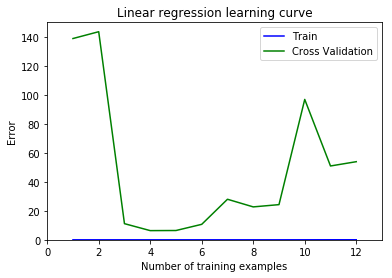

In [170]:
t_errors, cv_errors = calcLearnCurve(x_poly_8,y,x_cv_poly_8,y_cv)
plotLearnCurve(t_errors, cv_errors)